In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# MAR

## MAR: Comparing with paper experiment

<AxesSubplot:xlabel='experiment', ylabel='RMSE'>

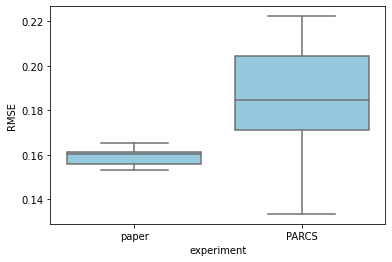

In [20]:
import pandas as pd
import json
import seaborn as sns

df = pd.DataFrame([], columns=('Simulator', 'RMSE'))

with open('./paper_original_experiment/MAR.json') as f:
        paper = json.load(f)
paper = pd.DataFrame({'experiment': ['paper']*10, 'RMSE': paper['hyperimpute']})

with open('./results/MAR_ZR_10.json') as f:
        parcs = json.load(f)
parcs = pd.DataFrame({'experiment': ['PARCS']*10, 'RMSE': parcs['hyperimpute']})

df = pd.concat([df, paper, parcs])
sns.boxplot(df, x='experiment', y='RMSE', color='skyblue')

## MAR: Gradually increasing Z->R edges density

<AxesSubplot:xlabel='density', ylabel='RMSE'>

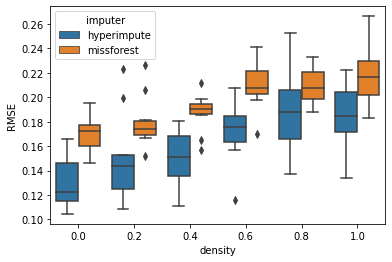

In [13]:
import pandas as pd
import json
import seaborn as sns

df = pd.DataFrame([], columns=('RMSE', 'imputer', 'density'))
for name, density in zip(
        ['./results/MAR_ZR_{}.json'.format(d) for d in ['00', '02', '04', '06', '08', '10']],
        [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]):
    with open(name) as f:
        report = json.load(f)
    hp = pd.DataFrame({'imputer': ['hyperimpute']*10, 'density': [str(density)]*10, 'RMSE': report['hyperimpute']})
    mf = pd.DataFrame({'imputer': ['missforest']*10, 'density': [str(density)]*10, 'RMSE': report['missforest']})
    df = pd.concat([df, hp, mf], ignore_index=True)

sns.boxplot(df, x='density', y='RMSE', hue='imputer')

## MAR: Gradually increasing R->R edges density

For this experiment, Z->R edges are set to `density=0`

<AxesSubplot:xlabel='density', ylabel='RMSE'>

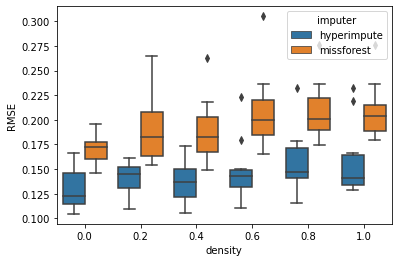

In [25]:
import pandas as pd
import json
import seaborn as sns

df = pd.DataFrame([], columns=('RMSE', 'imputer', 'density'))

# for zero
with open('./results/MAR_ZR_00.json') as f:
    report = json.load(f)
hp = pd.DataFrame({'imputer': ['hyperimpute']*10, 'density': ['0.0']*10, 'RMSE': report['hyperimpute']})
mf = pd.DataFrame({'imputer': ['missforest']*10, 'density': ['0.0']*10, 'RMSE': report['missforest']})
df = pd.concat([df, hp, mf], ignore_index=True)


for name, density in zip(
        ['./results/MAR_RR_{}.json'.format(d) for d in ['02', '04', '06', '08', '10']],
        [0.2, 0.4, 0.6, 0.8, 1.0]):
    with open(name) as f:
        report = json.load(f)
    hp = pd.DataFrame({'imputer': ['hyperimpute']*10, 'density': [str(density)]*10, 'RMSE': report['hyperimpute']})
    mf = pd.DataFrame({'imputer': ['missforest']*10, 'density': [str(density)]*10, 'RMSE': report['missforest']})
    df = pd.concat([df, hp, mf], ignore_index=True)

sns.boxplot(df, x='density', y='RMSE', hue='imputer')

## MAR: Nonlinear relations

For this experiment, the R->R edges are 0, and Z->R edges are 0.6

<AxesSubplot:xlabel='linearity', ylabel='RMSE'>

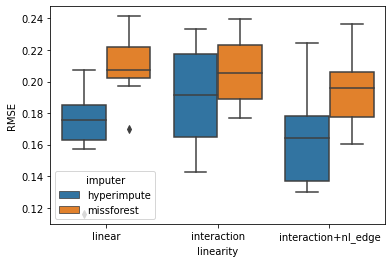

In [29]:
import pandas as pd
import json
import seaborn as sns

df = pd.DataFrame([], columns=('RMSE', 'imputer', 'linearity'))

for name, linearity in zip(
        ['./results/{}.json'.format(i) for i in ['MAR_ZR_06', 'MAR_nonlin', 'MAR_nonlin_edge']],
        ['linear', 'interaction', 'interaction+nl_edge']):
    with open(name) as f:
        report = json.load(f)
    hp = pd.DataFrame({'imputer': ['hyperimpute']*10, 'linearity': [linearity]*10, 'RMSE': report['hyperimpute']})
    mf = pd.DataFrame({'imputer': ['missforest']*10, 'linearity': [linearity]*10, 'RMSE': report['missforest']})
    df = pd.concat([df, hp, mf], ignore_index=True)

sns.boxplot(df, x='linearity', y='RMSE', hue='imputer')

# MNAR

## MNAR: determining mechansims

Experiments are done with:

- Z->R density: 1
- MNARs: SC, NSC, block conditional
- relations: linear

<AxesSubplot:xlabel='linearity', ylabel='RMSE'>

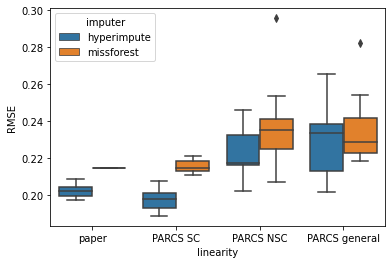

In [35]:
import pandas as pd
import json
import seaborn as sns

df = pd.DataFrame([], columns=('RMSE', 'imputer', 'mechanism'))

for name, linearity in zip(
        ['./results/{}.json'.format(i) for i in ['MNAR', 'MNAR_SC', 'MNAR_NSC', 'MNAR_general']],
        ['paper', 'PARCS SC', 'PARCS NSC', 'PARCS general']):
    with open(name) as f:
        report = json.load(f)
    hp = pd.DataFrame({'imputer': ['hyperimpute']*10, 'linearity': [linearity]*10, 'RMSE': report['hyperimpute']})
    mf = pd.DataFrame({'imputer': ['missforest']*10, 'linearity': [linearity]*10, 'RMSE': report['missforest']})
    df = pd.concat([df, hp, mf], ignore_index=True)

sns.boxplot(df, x='linearity', y='RMSE', hue='imputer')